In [84]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import scipy
import os
from scipy.sparse.linalg import eigs, eigsh
from sklearn.cluster import KMeans
import math
import pandas as pd

In [85]:
# Read data (graph edges)
data_path = os.path.join('Data\Disney', 'edgeWeight.txt') #data/Disney (for github project)
with open(data_path) as f:
    edges = [tuple([int(x) for x in line.strip().split('	')]) for line in f]
edges = [tuple([edge[0], edge[1]]) for edge in edges]


In [86]:
# Read attribute data
att_path = os.path.join('Data\Disney', 'Data.txt')   #data/Disney (for github project)
with open(att_path) as f:
    attributes = [tuple([float(x) for x in line.strip().split('	')]) for line in f]

In [87]:
# Read cluster labels data
cluster_l = np.loadtxt('Data\Disney\clusterData.csv', dtype=int)   #data/Disney (for github project)
cluster_l.shape

(124,)

In [88]:
nodes = np.unique(np.asarray(edges))
num_nodes= nodes.shape[0]

In [89]:
a_dict = {}
att_numbers = range(28)
att_names = range(28)
node_att = {}

for y in range(nodes.shape[0]):
    for x in att_numbers:
        a=dict(zip(att_names,attributes[y]))
    node_att[y] = a
#node_att

In [90]:
G = nx.MultiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_node_attributes(G,node_att)
G

In [91]:
edges = [b for a, b in G.adjacency()]

In [92]:
distance = [[[0 for k in range(28)] for j in range(124)] for i in range(124)]
x = int
for y in range(0,124):
    for x in edges[y]:
        for j in range(0,28):
            distance[y][x][j]=math.exp(-(pow(abs(attributes[y][j] - attributes[x][j]),2))/2)


In [93]:
S0 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S0[y][x] = math.exp((-(pow(abs(attributes[y][0]-attributes[x][0]),2)))/2)
S2 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S2[y][x] = math.exp((-(pow(abs(attributes[y][2]-attributes[x][2]),2)))/2)
S3 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S3[y][x] = math.exp((-(pow(abs(attributes[y][3]-attributes[x][3]),2)))/2)
S4 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S4[y][x] = math.exp((-(pow(abs(attributes[y][4]-attributes[x][4]),2)))/2)
S8 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S8[y][x] = math.exp((-(pow(abs(attributes[y][8]-attributes[x][8]),2)))/2)
S9 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S9[y][x] = math.exp((-(pow(abs(attributes[y][9]-attributes[x][9]),2)))/2)
S10 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S10[y][x] = math.exp((-(pow(abs(attributes[y][10]-attributes[x][10]),2)))/2)
S12 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S12[y][x] = math.exp((-(pow(abs(attributes[y][12]-attributes[x][12]),2)))/2)
S14 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S14[y][x] = math.exp((-(pow(abs(attributes[y][14]-attributes[x][14]),2)))/2)
S16 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S16[y][x] = math.exp((-(pow(abs(attributes[y][16]-attributes[x][16]),2)))/2)
S17 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S17[y][x] = math.exp((-(pow(abs(attributes[y][17]-attributes[x][17]),2)))/2)
S20 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S20[y][x] = math.exp((-(pow(abs(attributes[y][20]-attributes[x][20]),2)))/2)
S22 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S22[y][x] = math.exp((-(pow(abs(attributes[y][22]-attributes[x][22]),2)))/2)
S23 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S23[y][x] = math.exp((-(pow(abs(attributes[y][23]-attributes[x][23]),2)))/2)
S24 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S24[y][x] = math.exp((-(pow(abs(attributes[y][24]-attributes[x][24]),2)))/2)
S25 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S25[y][x] = math.exp((-(pow(abs(attributes[y][25]-attributes[x][25]),2)))/2)
S26 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S26[y][x] = math.exp((-(pow(abs(attributes[y][26]-attributes[x][26]),2)))/2)
S27 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in edges[y]:
        S27[y][x] = math.exp((-(pow(abs(attributes[y][27]-attributes[x][27]),2)))/2)


In [94]:
DiagS0 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS0[y][y] += S0[y][x]

DiagS2 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS2[y][y] += S2[y][x]

DiagS3 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS3[y][y] += S3[y][x]

DiagS4 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS4[y][y] += S4[y][x]

DiagS8 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS8[y][y] += S8[y][x]

DiagS9 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS9[y][y] += S9[y][x]

DiagS10 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS10[y][y] += S10[y][x]

DiagS12 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS12[y][y] += S12[y][x]

DiagS14 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS14[y][y] += S14[y][x]

DiagS16 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS16[y][y] += S16[y][x]

DiagS17 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS17[y][y] += S17[y][x]

DiagS20 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS20[y][y] += S20[y][x]

DiagS22 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS22[y][y] += S22[y][x]

DiagS23 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS23[y][y] += S23[y][x]

DiagS24 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS24[y][y] += S24[y][x]

DiagS25 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS25[y][y] += S25[y][x]

DiagS26 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS26[y][y] += S26[y][x]

DiagS27 = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagS27[y][y] += S27[y][x]

In [95]:
MatDiagS0 = np.linalg.inv(np.sqrt(DiagS0))
MatDiagS2 = np.linalg.inv(np.sqrt(DiagS2))
MatDiagS3 = np.linalg.inv(np.sqrt(DiagS3))
MatDiagS4 = np.linalg.inv(np.sqrt(DiagS4))
MatDiagS8 = np.linalg.inv(np.sqrt(DiagS8))
MatDiagS9 = np.linalg.inv(np.sqrt(DiagS9))
MatDiagS10 = np.linalg.inv(np.sqrt(DiagS10))
MatDiagS12 = np.linalg.inv(np.sqrt(DiagS12))
MatDiagS14 = np.linalg.inv(np.sqrt(DiagS14))
MatDiagS16 = np.linalg.inv(np.sqrt(DiagS16))
MatDiagS17 = np.linalg.inv(np.sqrt(DiagS17))
MatDiagS20 = np.linalg.inv(np.sqrt(DiagS20))
MatDiagS22 = np.linalg.inv(np.sqrt(DiagS22))
MatDiagS23 = np.linalg.inv(np.sqrt(DiagS23))
MatDiagS24 = np.linalg.inv(np.sqrt(DiagS24))
MatDiagS25 = np.linalg.inv(np.sqrt(DiagS25))
MatDiagS26 = np.linalg.inv(np.sqrt(DiagS26))
MatDiagS27 = np.linalg.inv(np.sqrt(DiagS27))

In [96]:
I = np.identity(124)

In [97]:
k = 9 
DSD0 = np.dot(np.dot(MatDiagS0,S0),MatDiagS0)
L0 = I - DSD0
w0, v0 = np.linalg.eigh(L0)
U0 = v0[:,:k]

DSD2 = np.dot(np.dot(MatDiagS2,S2),MatDiagS2)
L2 = I - DSD2
w2, v2 = np.linalg.eigh(L2)
U2 = v2[:,:k]

DSD3 = np.dot(np.dot(MatDiagS3,S3),MatDiagS3)
L3 = I - DSD3
w3, v3 = np.linalg.eigh(L3)
U3 = v3[:,:k]

DSD4 = np.dot(np.dot(MatDiagS4,S4),MatDiagS4)
L4 = I - DSD4
w4, v4 = np.linalg.eigh(L4)
U4 = v4[:,:k]

DSD8 = np.dot(np.dot(MatDiagS8,S8),MatDiagS8)
L8 = I - DSD8
w8, v8 = np.linalg.eigh(L8)
U8 = v8[:,:k]

DSD9 = np.dot(np.dot(MatDiagS9,S9),MatDiagS9)
L9 = I - DSD9
w9, v9 = np.linalg.eigh(L9)
U9 = v9[:,:k]

DSD10 = np.dot(np.dot(MatDiagS10,S10),MatDiagS10)
L10 = I - DSD10
w10, v10 = np.linalg.eigh(L10)
U10 = v10[:,:k]

DSD12 = np.dot(np.dot(MatDiagS12,S12),MatDiagS12)
L12 = I - DSD12
w12, v12 = np.linalg.eigh(L12)
U12 = v12[:,:k]

DSD14 = np.dot(np.dot(MatDiagS14,S14),MatDiagS14)
L14 = I - DSD14
w14, v14 = np.linalg.eigh(L14)
U14 = v14[:,:k]

DSD16 = np.dot(np.dot(MatDiagS16,S16),MatDiagS16)
L16 = I - DSD16
w16, v16 = np.linalg.eigh(L16)
U16 = v16[:,:k]

DSD17 = np.dot(np.dot(MatDiagS17,S17),MatDiagS17)
L17 = I - DSD17
w17, v17 = np.linalg.eigh(L17)
U17 = v17[:,:k]

DSD20 = np.dot(np.dot(MatDiagS20,S20),MatDiagS20)
L20 = I - DSD20
w20, v20 = np.linalg.eigh(L20)
U20 = v20[:,:k]

DSD22 = np.dot(np.dot(MatDiagS22,S22),MatDiagS22)
L22 = I - DSD22
w22, v22 = np.linalg.eigh(L22)
U22 = v22[:,:k]

DSD23 = np.dot(np.dot(MatDiagS23,S23),MatDiagS23)
L23 = I - DSD23
w23, v23 = np.linalg.eigh(L23)
U23 = v23[:,:k]

DSD24 = np.dot(np.dot(MatDiagS24,S24),MatDiagS24)
L24 = I - DSD24
w24, v24 = np.linalg.eigh(L24)
U24 = v24[:,:k]

DSD25 = np.dot(np.dot(MatDiagS25,S25),MatDiagS25)
L25 = I - DSD25
w25, v25 = np.linalg.eigh(L25)
U25 = v25[:,:k]

DSD26 = np.dot(np.dot(MatDiagS26,S26),MatDiagS26)
L26 = I - DSD26
w26, v26 = np.linalg.eigh(L26)
U26 = v26[:,:k]

DSD27 = np.dot(np.dot(MatDiagS27,S27),MatDiagS27)
L27 = I - DSD27
w27, v27 = np.linalg.eigh(L27)
U27 = v27[:,:k]

In [48]:
'''
UP0 = np.dot(np.transpose(U0),U0)
UP2 = np.dot(np.transpose(U2),U2)
UP3 = np.dot(np.transpose(U3),U3)
UP4 = np.dot(np.transpose(U4),U4)
UP8 = np.dot(np.transpose(U8),U8)
UP9 = np.dot(np.transpose(U9),U9)
UP10 = np.dot(np.transpose(U10),U10)
UP12 = np.dot(np.transpose(U12),U12)
UP14 = np.dot(np.transpose(U14),U14)
UP16 = np.dot(np.transpose(U16),U16)
UP17 = np.dot(np.transpose(U17),U17)
UP20 = np.dot(np.transpose(U20),U20)
UP22 = np.dot(np.transpose(U22),U22)
UP23 = np.dot(np.transpose(U23),U23)
UP24 = np.dot(np.transpose(U24),U24)
UP25 = np.dot(np.transpose(U25),U25)
UP26 = np.dot(np.transpose(U26),U26)
UP27 = np.dot(np.transpose(U27),U27)
'''

In [98]:
UP0T= np.dot(U0,np.transpose(U0))
UP2T= np.dot(U2,np.transpose(U2))
UP3T= np.dot(U3,np.transpose(U3))
UP4T= np.dot(U4,np.transpose(U4))
UP8T= np.dot(U8,np.transpose(U8))
UP9T= np.dot(U9,np.transpose(U9))
UP10T= np.dot(U10,np.transpose(U10))
UP12T= np.dot(U12,np.transpose(U12))
UP14T= np.dot(U14,np.transpose(U14))
UP16T= np.dot(U16,np.transpose(U16))
UP17T= np.dot(U17,np.transpose(U17))
UP20T= np.dot(U20,np.transpose(U20))
UP22T= np.dot(U22,np.transpose(U22))
UP23T= np.dot(U23,np.transpose(U23))
UP24T= np.dot(U24,np.transpose(U24))
UP25T= np.dot(U25,np.transpose(U25))
UP26T= np.dot(U26,np.transpose(U26))
UP27T= np.dot(U27,np.transpose(U27))

In [99]:
UTotalT = UP0T + UP2T + UP3T + UP4T + UP8T + UP9T + UP10T + UP12T + UP14T + UP16T + UP17T + UP20T + UP22T + UP23T + UP24T + UP25T + UP26T + UP27T


In [103]:
FP0 = np.trace(np.dot(UP0T,(L0+0.01*(UTotalT-UP0T))))
FP2 = np.trace(np.dot(UP2T,(L2+0.01*(UTotalT-UP2T))))
FP3 = np.trace(np.dot(UP3T,(L3+0.01*(UTotalT-UP3T))))
FP4 = np.trace(np.dot(UP4T,(L4+0.01*(UTotalT-UP4T))))
FP8 = np.trace(np.dot(UP8T,(L8+0.01*(UTotalT-UP8T))))
FP9 = np.trace(np.dot(UP9T,(L9+0.01*(UTotalT-UP9T))))
FP10 = np.trace(np.dot(UP10T,(L10+0.01*(UTotalT-UP10T))))
FP12 = np.trace(np.dot(UP12T,(L12+0.01*(UTotalT-UP12T))))
FP14 = np.trace(np.dot(UP14T,(L14+0.01*(UTotalT-UP14T))))
FP16 = np.trace(np.dot(UP16T,(L16+0.01*(UTotalT-UP16T))))
FP17 = np.trace(np.dot(UP17T,(L17+0.01*(UTotalT-UP17T))))
FP20 = np.trace(np.dot(UP20T,(L20+0.01*(UTotalT-UP20T))))
FP22 = np.trace(np.dot(UP22T,(L22+0.01*(UTotalT-UP22T))))
FP23 = np.trace(np.dot(UP23T,(L23+0.01*(UTotalT-UP23T))))
FP24 = np.trace(np.dot(UP24T,(L24+0.01*(UTotalT-UP24T))))
FP25 = np.trace(np.dot(UP25T,(L25+0.01*(UTotalT-UP25T))))
FP26 = np.trace(np.dot(UP26T,(L26+0.01*(UTotalT-UP26T))))
FP27 = np.trace(np.dot(UP27T,(L27+0.01*(UTotalT-UP27T))))

In [104]:
FP = np.array([FP0,FP2,FP3,FP4,FP8,FP9,FP10,FP12,FP14,FP16,FP17,FP20,FP22,FP23,FP24,FP25,FP26,FP27])

In [105]:
for i in FP:
    print(i)

2.0319798387029575
1.7209247393026188
2.03073345991812
2.024472743468681
1.7305369233503172
1.6009510076545177
1.3451947149425636
2.0319282885331282
2.0282645548920075
0.9866461204345646
1.7158353124863797
0.5876903192529762
2.0258223447597565
1.9311920964811702
1.340972878025579
1.2518520475005719
0.7866221469444604
2.0207528932716348


In [106]:
FP.max()

2.0319798387029575

In [82]:
FP[11]

0.05876981426713804

In [83]:
FP20

0.04571743311344287

In [607]:
#U20

In [384]:
'''
FP00 = np.trace(np.dot(UP0T,(L0+(UTotalT-UP0T))))
FP22 = np.trace(np.dot(UP2T,(L2+(UTotalT-UP2T-UP0T))))
FP33 = np.trace(np.dot(UP3T,(L3+(UTotalT-UP3T-UP0T-UP2T))))
FP44 = np.trace(np.dot(UP4T,(L4+(UTotalT-UP4T-UP0T-UP2T-UP3T))))
FP88 = np.trace(np.dot(UP8T,(L8+(UTotalT-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP99 = np.trace(np.dot(UP9T,(L9+(UTotalT-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP1010 = np.trace(np.dot(UP10T,(L10+(UTotalT-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP1212 = np.trace(np.dot(UP12T,(L12+(UTotalT-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP1414 = np.trace(np.dot(UP14T,(L14+(UTotalT-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP1616 = np.trace(np.dot(UP16T,(L16+(UTotalT-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP1717 = np.trace(np.dot(UP17T,(L17+(UTotalT-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2020 = np.trace(np.dot(UP20T,(L20+(UTotalT-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2222 = np.trace(np.dot(UP22T,(L22+(UTotalT-UP22T-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2323 = np.trace(np.dot(UP23T,(L23+(UTotalT-UP23T-UP22T-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2424 = np.trace(np.dot(UP24T,(L24+(UTotalT-UP24T-UP23T-UP22T-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2525 = np.trace(np.dot(UP25T,(L25+(UTotalT-UP25T-UP24T-UP23T-UP22T-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2626 = np.trace(np.dot(UP26T,(L26+(UTotalT-UP26T-UP25T-UP24T-UP23T-UP22T-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
FP2727 = np.trace(np.dot(UP27T,(L27+(UTotalT-UP27T-UP26T-UP25T-UP24T-UP23T-UP22T-UP20T-UP17T-UP16T-UP14T-UP12T-UP10T-UP9T-UP8T-UP4T-UP0T-UP2T-UP3T))))
'''

In [389]:
#FPFP = np.array([FP00,FP22,FP33,FP44,FP88,FP99,FP1010,FP1212,FP1414,FP1616,FP1717,FP2020,FP2222,FP2323,FP2424,FP2525,FP2626,FP2727])

In [390]:
#FPFP.max()

130.90644293508947

In [606]:
#for i in FPFP:
#    print(i)

In [395]:
#FPargmax = np.argmax(FPFP)

In [396]:
#FPargmax

0

In [107]:
WP0 = FP0/FP.mean()
WP2 = FP2/FP.mean()
WP3 = FP3/FP.mean()
WP4 = FP4/FP.mean()
WP8 = FP8/FP.mean()
WP9 = FP9/FP.mean()
WP10 = FP10/FP.mean()
WP12 = FP12/FP.mean()
WP14 = FP14/FP.mean()
WP16 = FP16/FP.mean()
WP20 = FP20/FP.mean()
WP17 = FP17/FP.mean()
WP22 = FP22/FP.mean()
WP23 = FP23/FP.mean()
WP24 = FP24/FP.mean()
WP25 = FP25/FP.mean()
WP26 = FP26/FP.mean()
WP27 = FP27/FP.mean()


In [108]:
WP = np.array([WP0,WP2,WP3,WP4,WP8,WP9,WP10,WP12,WP14,WP16,WP17,WP20,WP22,WP23,WP24,WP25,WP26,WP27])

In [109]:
WP.max()

1.2529175963500463

In [110]:
for i in WP:
    print(i)

1.2529175963500463
1.0611212014990692
1.2521490799103179
1.2482887257592317
1.0670480686378712
0.9871454677744502
0.8294462852271456
1.2528858105450675
1.2506267544954612
0.6083654286904976
1.0579830638601289
0.3623695118287389
1.2491208891367602
1.1907719326378141
0.8268431030195963
0.7718912503292731
0.4850307620249184
1.2459950682736138


In [64]:
WP[7]

1.4016312924254108

In [66]:
WP12

1.0856117410985908

In [111]:
WS0 = np.dot(WP0,S0) 
WS2 = np.dot(WP2,S2) 
WS3 = np.dot(WP3,S3) 
WS4 = np.dot(WP4,S4) 
WS8 = np.dot(WP8,S8) 
WS9 = np.dot(WP9,S9) 
WS10 = np.dot(WP10,S10) 
WS12 = np.dot(WP12,S12) 
WS14 = np.dot(WP14,S14) 
WS16 = np.dot(WP16,S16) 
WS17 = np.dot(WP17,S17) 
WS20 = np.dot(WP20,S20) 
WS22 = np.dot(WP22,S22) 
WS23 = np.dot(WP23,S23) 
WS24 = np.dot(WP24,S24) 
WS25 = np.dot(WP25,S25) 
WS26 = np.dot(WP26,S26) 
WS27 = np.dot(WP27,S27) 


In [112]:
WSTotal = WS0 + WS2 + WS3 + WS4 + WS8 + WS9 + WS10 + WS12 + WS14 + WS16 + WS17 + WS20 + WS22 + WS23 + WS24 + WS25 + WS26 + WS27

In [444]:
WSTotal
dfWS = pd.DataFrame(data=WSTotal)
dfWS.to_csv("CSV\X\WSTotal.csv")

In [113]:
DiagWSTotal = [[0 for j in range(124)] for i in range(124)]
for y in range(124):
    for x in range(124):
        DiagWSTotal[y][y] += WSTotal[y][x]


        
MatDiagWSTotal = np.linalg.inv(np.sqrt(DiagWSTotal))
I = np.identity(124)
DS = np.dot(MatDiagWSTotal,WSTotal)
DSD = np.dot(DS,MatDiagWSTotal)
LWSTotal = I - DSD
w, v = np.linalg.eigh(LWSTotal)
k = 9 
#UWSTotal = v[:,num_nodes-k:]


In [114]:
UWSTotal = v[:,:k]

In [115]:
Y = np.divide(UWSTotal, np.reshape(np.linalg.norm(UWSTotal, axis=1), (UWSTotal.shape[0], 1)))

C:\Users\Ylli\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


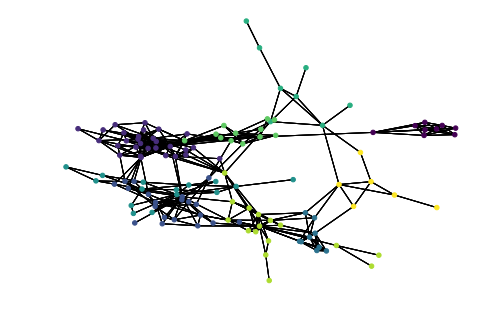

In [116]:
kmeans = KMeans(n_clusters=9, random_state=1234).fit(Y)
cluster_labels=kmeans.labels_
nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)

In [117]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(cluster_l, cluster_labels)

C:\Users\Ylli\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7826470539164362

In [77]:
ClusterL = pd.DataFrame(data=cluster_labels)
ClusterL.to_csv("data\ClusterLabelsExperiment.txt", index=False, header=False)
